In [ ]:
import pandas as pd
import numpy as np 
from google.colab import drive
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/news_articles.csv", header = [0])
#data = pd.read_csv("news_articles.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
initial_data = data.replace("?",np.NAN)
print(initial_data.isnull().sum())

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


# Analysis 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
data['type'].describe()

count     2095
unique       8
top         bs
freq       601
Name: type, dtype: object

In [ ]:
data['hasImage'].value_counts()

1.0    1628
0.0     467
Name: hasImage, dtype: int64

In [ ]:
data['title'].value_counts()

no title                                                                                                                                   186
newsticker                                                                                                                                  11
our new country women and minorities hit hardest                                                                                             3
world wildlife falls by  in  years                                                                                                           3
smart meter case testimony before the pennsylvania public utility commission what no one wants to acknowledge about emf damage part  of      3
                                                                                                                                          ... 
powerful docudrama the hidden rebellion exposes christian persecution under french revolution                                                1

In [ ]:
data['title'].nunique()

1784

In [ ]:
data.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [ ]:
#fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#boxplot = data.boxplot(column=['hasImage'])   
# show plot


In [ ]:
df=data.copy()

In [ ]:
#df1 = pd.read_csv('news_articles.csv', encoding="latin", index_col=0)
df1 = df.dropna()
df1.count()

author                     2045
published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

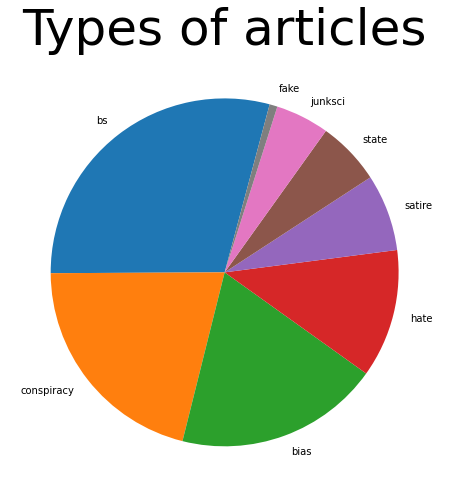

In [ ]:
import matplotlib.pyplot as plt
df1['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 50)
plt.axis('off')
plt.show()

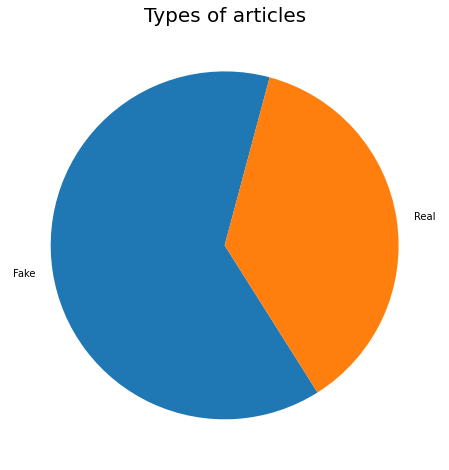

In [ ]:
df1['label'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()

In [ ]:
common_words = get_top_n_bigram(df1['text_without_stopwords'], 20)
cw = list(common_words)
cw

[('hillary clinton', 1073),
 ('donald trump', 885),
 ('united states', 499),
 ('new york', 335),
 ('white house', 324),
 ('clinton campaign', 248),
 ('hillary clintons', 230),
 ('brain force', 209),
 ('bill clinton', 205),
 ('clinton foundation', 185),
 ('secretary state', 182),
 ('presidential election', 149),
 ('fbi director', 147),
 ('barack obama', 142),
 ('mainstream media', 139),
 ('alex jones', 136),
 ('attorney general', 132),
 ('election day', 132),
 ('donald trumps', 131),
 ('democratic party', 129)]

In [ ]:
x_val = []
y_val = []
for i in cw:
  x = list(i)
  x_val.append(x[0])
  y_val.append(x[1])

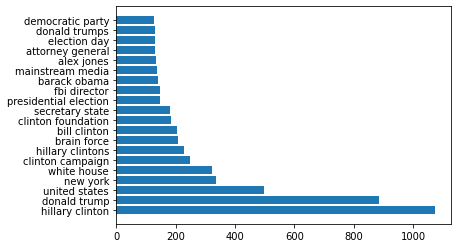

In [ ]:
plt.barh(x_val, y_val)
plt.show()

In [ ]:
df1.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df1.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


# Preprocessing

## Taking care of null/missing values

In [ ]:
data.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

## Transforming categorical data

In [ ]:
data["language"].value_counts()

english    1967
german       72
ignore        3
french        2
spanish       1
Name: language, dtype: int64

In [ ]:
data["type"].value_counts()

bs            598
conspiracy    430
bias          389
hate          244
satire        146
state         121
junksci       102
fake           15
Name: type, dtype: int64

In [ ]:
data["label"].value_counts()

Fake    1291
Real     754
Name: label, dtype: int64

### One-hot encoding

In [ ]:
onehot_cols = ['label']
data = pd.get_dummies(data,prefix=onehot_cols,columns=onehot_cols)

In [ ]:
data.head(1)

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label_Fake,label_Real
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,0,1


In [ ]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
data.type = [type1[item] for item in data.type]

## Uppercase to lowercase

In [ ]:
data = data.astype(str).apply(lambda x: x.str.lower())
data.head(1)

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label_Fake,label_Real
0,barracuda brigade,2016-10-26t21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/fu...,0,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,0,1


#**Vectorization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 

In [ ]:
data.shape

(2045, 13)

In [ ]:
y = data.type

x = data.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

In [ ]:
x.head()

0    100percentfedup.com print pay back money plus ...
1    100percentfedup.com attorney general loretta l...
2    100percentfedup.com red state fox news sunday ...
3    100percentfedup.com email kayla mueller prison...
4    100percentfedup.com email healthcare reform ma...
Name: source, dtype: object

In [ ]:
def split_data(a, b, size):
    x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=size)
    tfidf_vect = TfidfVectorizer(stop_words = 'english')
    tfidf_train = tfidf_vect.fit_transform(x_train)
    tfidf_test = tfidf_vect.transform(x_test)
    tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

    return {"x_train":x_train, "x_test":x_train,"y_train":y_train,"y_test":y_test,"tfidf_vect":tfidf_vect,"tfidf_train":tfidf_train,
    "tfidf_test":tfidf_test,"tfidf_df":tfidf_df}

# **Models**

In [ ]:
## Importing packages 

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

## **Logisitc Regression**

In [ ]:
## Performing Hyperparamters tuning 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy import stats

train_data = split_data(x, y, size=0.20)

hyper_params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

lr = LogisticRegression()
gd = GridSearchCV(estimator=lr, cv=5, param_grid=hyper_params, scoring='accuracy', verbose=1, n_jobs=-1)

gd.fit(train_data['tfidf_train'],train_data['y_train'])

print(gd.best_params_)
print(gd.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.9614865368837174


In [ ]:
lr = LogisticRegression(C =  100, penalty = 'l1', solver = 'liblinear')

lr.fit(train_data['tfidf_train'],train_data['y_train'])


LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [ ]:
## Testing the model 

##Train data 
y_pred_train = lr.predict(train_data['tfidf_train'])
print("accuracy:" ,accuracy_score(train_data['y_train'],y_pred_train))
print("\n\n Confusion matrix\n", confusion_matrix(train_data['y_train'],y_pred_train))
#print("\n\n Classification Report\n", classification_report(train_data['y_train'],y_pred_train))

accuracy: 1.0


 Confusion matrix
 [[326   0   0   0   0   0   0   0]
 [  0 333   0   0   0   0   0   0]
 [  0   0  13   0   0   0   0   0]
 [  0   0   0 473   0   0   0   0]
 [  0   0   0   0 119   0   0   0]
 [  0   0   0   0   0 201   0   0]
 [  0   0   0   0   0   0  83   0]
 [  0   0   0   0   0   0   0  88]]


In [ ]:

## Test data
y_pred_test = lr.predict(train_data['tfidf_test'])
print("accuracy:", accuracy_score(train_data['y_test'], y_pred_test))
print("\n\nConfusion matrix\n", confusion_matrix(train_data['y_test'], y_pred_test))
#print("\n\nClassification Report", classification_report(train_data['y_test'],y_pred_test))

## **SVM**

In [ ]:
## Performing Hyperparamters tuning 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy import stats

hyper_params = {
    'kernel':['linear','poly','rbf'],
    'C' : [100, 10, 1.0, 0.1],
    'gamma': [1, 0.1, 0.01]

}

svc = SVC()
gd = GridSearchCV(estimator=svc, cv=5, param_grid=hyper_params, scoring='accuracy', verbose=1)

gd.fit(train_data['tfidf_train'], train_data['y_train'])

print(gd.best_params_)
print(gd.best_score_)

In [ ]:
svc = SVC(kernel='linear',C=100,gamma=1)

svc.fit(train_data['tfidf_train'], train_data['y_train'])

In [ ]:
## Testing the model 

##Train data 
y_pred_train = svc.predict(train_data['tfidf_train'])
print("accuracy Score:" , accuracy_score(train_data['y_train'], y_pred_train))
print("\n\nConfusion matrix\n", confusion_matrix(train_data['y_train'], y_pred_train))
#print("\n\nClassification Report", classification_report(train_data['y_train'], y_pred_train))

In [ ]:
## Test data
y_pred_test = svc.predict(train_data['tfidf_test'])
print("accuracy:", accuracy_score(train_data['y_test'], y_pred_test))
print("\n\nConfusion matrix\n", confusion_matrix(train_data['y_test'], y_pred_test))
#print("\n\nClassification Report", classification_report(y_test_80,y_pred_test))